# INF2178 A2-Yixin Chang (1005991651)

### Load the dataset

In [24]:
# Student ID: 1005991651
# Student name: Yixin Chang
# Course code: INF2178

# Assignment 2

#import stuff here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat

In [25]:
# Load data and head data
file_path = 'INF2178_A2_data.xlsx'
df = pd.read_excel(file_path)
df.head()

,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y


### Examine and clean the dataset

In [26]:
# Drop specified columns that will not be used
df = df.drop(['_id', 'LOC_ID', 'LOC_NAME', 'ADDRESS', 'PCODE', 'ward',
              'bldg_type', 'BLDGNAME'], axis=1)
df.head()

,AUSPICE,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
0,Non Profit Agency,0,20,32,52,60,164,Y,Y
1,Non Profit Agency,0,0,12,26,45,83,Y,Y
2,Non Profit Agency,0,10,16,26,50,102,Y,Y
3,Non Profit Agency,10,15,40,0,0,65,Y,Y
4,Non Profit Agency,0,10,16,0,0,26,Y,Y


In [27]:
# Add a column calculating the rate of PGSPACE among total space
df['PG_RATE'] = df['PGSPACE'] / df['TOTSPACE']
# Drop specified columns that will not be used
df = df.drop(['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE',
              'TOTSPACE'], axis=1)
df

,AUSPICE,subsidy,cwelcc_flag,PG_RATE
0,Non Profit Agency,Y,Y,0.195122
1,Non Profit Agency,Y,Y,0.144578
2,Non Profit Agency,Y,Y,0.156863
3,Non Profit Agency,Y,Y,0.615385
4,Non Profit Agency,Y,Y,0.615385
...,...,...,...,...
1058,Non Profit Agency,Y,Y,0.000000
1059,Non Profit Agency,N,N,0.583333
1060,Non Profit Agency,N,N,0.489796
1061,Non Profit Agency,Y,Y,0.000000


In [28]:
# Check if there are any missing values in the entire DataFrame
if df.isna().values.any():
    print("There are missing values in the DataFrame.")
    # check for missing values in the DataFrame
    missing_values = df.isna().sum()
    # display the count of missing values for each column
    print(missing_values)
else:
    print("There are no missing values in the DataFrame.")

There are no missing values in the DataFrame.


### One-way ANOVA
* PG_RATE: PGSPACE / TOTSPACE
* If there is significant difference in PG_RATE with different operating auspice.

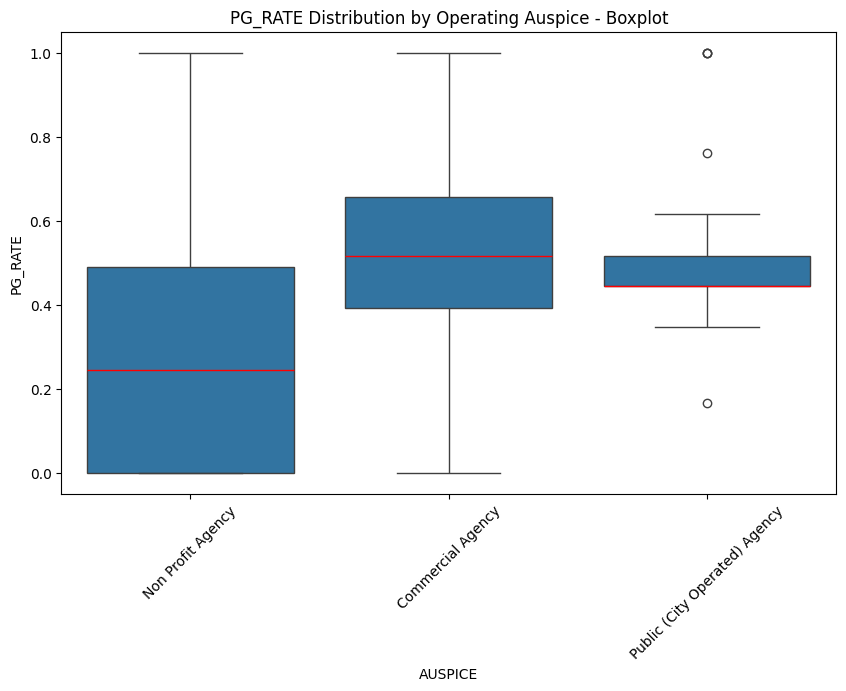

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 29.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


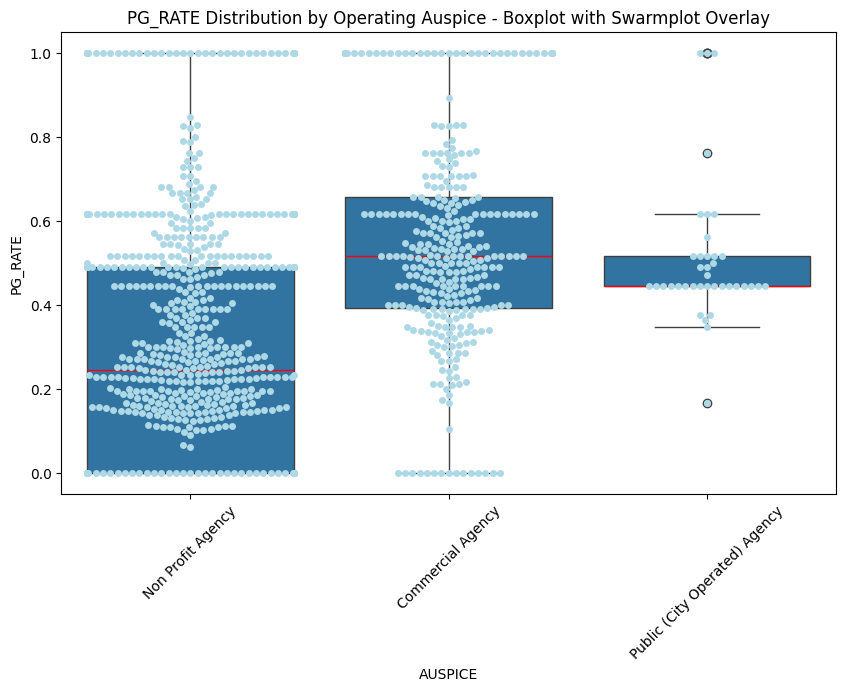

In [29]:
# Generate boxplots to see the PGSPACE rate distribution by operating
# auspice. Using boxplot, we can easily detect the differences between different
# operating auspice.

# First plot: Boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='AUSPICE', y='PG_RATE', data=df, medianprops={'color': 'red'})
plt.title('PG_RATE Distribution by Operating Auspice - Boxplot')
plt.xticks(rotation=45)
plt.show()

# Second plot: Boxplot with swarmplot overlay
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='AUSPICE', y='PG_RATE', data=df, medianprops={'color': 'red'})
ax = sns.swarmplot(x="AUSPICE", y="PG_RATE", data=df, color='lightblue')
plt.title('PG_RATE Distribution by Operating Auspice - Boxplot with Swarmplot Overlay')
plt.xticks(rotation=45)
plt.show()

In [30]:
# Ordinary Least Squares (OLS) model
model = ols('PG_RATE ~ C(AUSPICE)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

# ANOVA table
res = stat()
res.anova_stat(df=df, res_var='PG_RATE', anova_model='PG_RATE ~ C(AUSPICE)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,12.758888,6.379444,89.38639,1.338234e-36
Residual,1060.0,75.651454,0.071369,NaN,NaN


In [31]:
# Post hoc test using Scheffe's test or Tukey's HSD
res = stat()
res.tukey_hsd(df=df, res_var='PG_RATE', xfac_var='AUSPICE', anova_model='PG_RATE ~ C(AUSPICE)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,0.234484,0.192246,0.276721,18.426903,0.001000
1,Non Profit Agency,Public (City Operated) Agency,0.204242,0.101092,0.307392,6.572230,0.001000
2,Commercial Agency,Public (City Operated) Agency,0.030242,-0.076085,0.136569,0.944056,0.761851


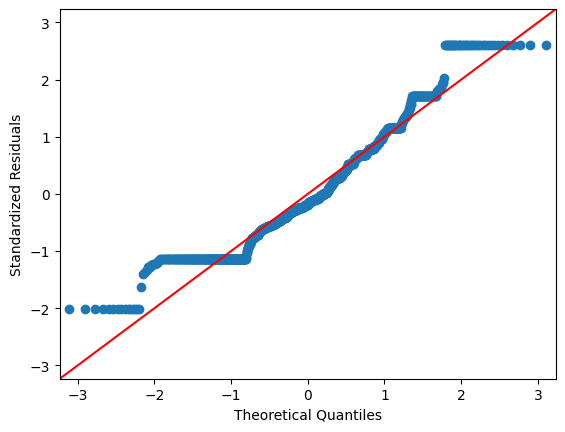

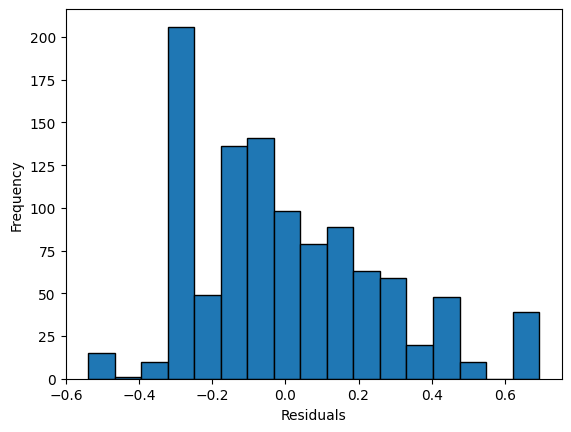

In [32]:
#checking model diagnostics
import statsmodels.api as sm
import matplotlib.pyplot as plt

# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [33]:
#assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(model.resid)
print(w,pvalue)

0.9466361403465271 3.7445380655721587e-19


In [34]:
#assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
res.levene(df=df, res_var='PG_RATE', xfac_var='AUSPICE')
res.levene_summary

,Parameter,Value
0,Test statistics (W),14.9864
1,Degrees of freedom (Df),2.0000
2,p value,0.0000


### Two-way ANOVA

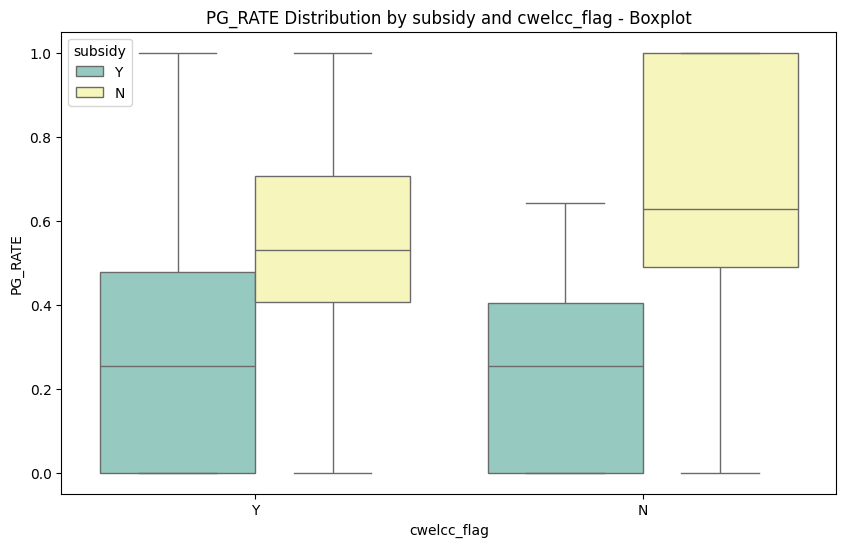

In [35]:
# Generate boxplots to see the PGSPACE rate distribution by subsidy and cwelcc_flag.

plt.figure(figsize=(10, 6))
sns.boxplot(x="cwelcc_flag", y="PG_RATE", hue="subsidy", data=df, palette="Set3")
plt.title('PG_RATE Distribution by subsidy and cwelcc_flag - Boxplot')
plt.show()

In [36]:
# Ordinary Least Squares (OLS) model
model=ols('PG_RATE ~ C(cwelcc_flag) + C(subsidy) + C(cwelcc_flag):C(subsidy)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(cwelcc_flag),0.293526,1.0,4.726582,2.992074e-02
C(subsidy),15.055998,1.0,242.443390,2.222037e-49
C(cwelcc_flag):C(subsidy),0.180476,1.0,2.906162,8.853495e-02
Residual,65.765053,1059.0,NaN,NaN


In [37]:
# ANOVA table
res = stat()
res.anova_stat(df=df, res_var='PG_RATE', anova_model='PG_RATE ~ C(cwelcc_flag) + C(subsidy) + C(cwelcc_flag):C(subsidy)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(cwelcc_flag),1.0,0.293526,0.293526,4.726582,2.992074e-02
C(subsidy),1.0,15.055998,15.055998,242.443390,2.222037e-49
C(cwelcc_flag):C(subsidy),1.0,0.180476,0.180476,2.906162,8.853495e-02
Residual,1059.0,65.765053,0.062101,NaN,NaN


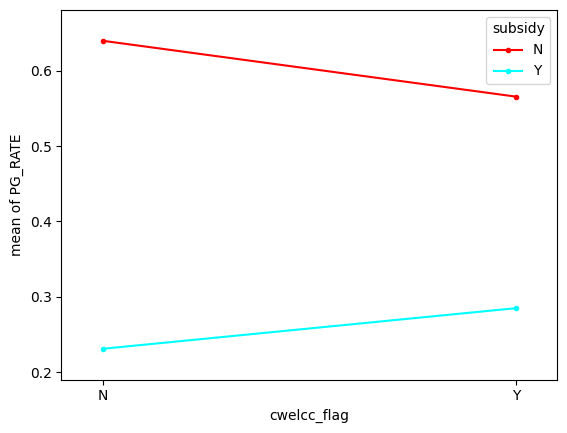

In [38]:
# interactive plot
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig = interaction_plot(x=df['cwelcc_flag'],trace=df['subsidy'],response=df['PG_RATE'])
plt.show()

In [39]:
# Post hoc test using Scheffe's test or Tukey's HSD
res.tukey_hsd(df=df, res_var='PG_RATE',xfac_var='cwelcc_flag',anova_model='PG_RATE ~ C(cwelcc_flag) + C(subsidy) + C(cwelcc_flag):C(subsidy)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Y,N,0.249158,0.204398,0.293919,15.446844,0.001


In [40]:
# Post hoc test using Scheffe's test or Tukey's HSD
res.tukey_hsd(df=df,res_var='PG_RATE',xfac_var='subsidy',anova_model='PG_RATE ~ C(cwelcc_flag) + C(subsidy) + C(cwelcc_flag):C(subsidy)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Y,N,0.308454,0.276422,0.340486,26.721501,0.001


In [41]:
# Post hoc test using Scheffe's test or Tukey's HSD
res.tukey_hsd(df=df,res_var='PG_RATE',xfac_var=['cwelcc_flag', 'subsidy'],anova_model='PG_RATE ~ C(cwelcc_flag) + C(subsidy) + C(cwelcc_flag):C(subsidy)')
res.tukey_summary.head()

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(Y, Y)","(Y, N)",0.280822,0.231388,0.330257,20.671998,0.001000
1,"(Y, Y)","(N, Y)",0.053944,-0.125532,0.233421,1.093743,0.851111
2,"(Y, Y)","(N, N)",0.354983,0.292540,0.417426,20.687163,0.001000
3,"(Y, N)","(N, Y)",0.334767,0.151766,0.517767,6.656834,0.001000
4,"(Y, N)","(N, N)",0.074160,0.002213,0.146108,3.750895,0.040446


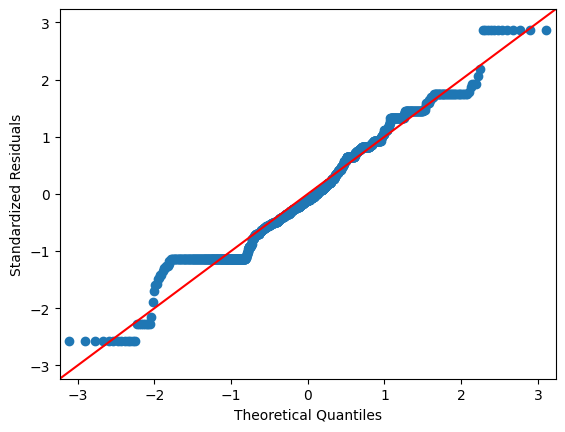

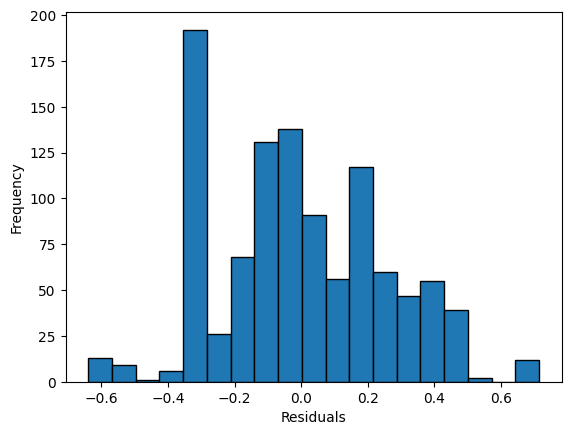

In [42]:
#checking model diagnostics
import statsmodels.api as sm
import matplotlib.pyplot as plt

# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [43]:
#assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(model.resid)
print(w,pvalue)

0.9716433882713318 1.463523584006171e-13


In [44]:
#assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed

res.levene(df=df, res_var='PG_RATE', xfac_var=['cwelcc_flag', 'subsidy'])
res.levene_summary

,Parameter,Value
0,Test statistics (W),5.5437
1,Degrees of freedom (Df),3.0000
2,p value,0.0009
